### 3.Idealista Exploratory Analysis

Once I cleanead all the data, It's time to start the analysis.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv("structured_dataw_description.csv")

I will not be using any text description so I will drop it first

In [4]:
df = df.drop(columns = ['description'])

In [5]:
df.head(10)

,id,property_type,adress,neighborhood,city,price,sq_m_built,sq_m_floor_area,n_bedrooms,bathrooms,...,parking,swimming pool,garden,air conditioning,heating,central_heating,heating_type,consumption_in_mkw/m2_year,emissions_in_kgco2/m2_year,orientation
0,103375204,Flat / apartment,"calle de Sant Pau, 25",El Raval,Barcelona,530000.00,80,NaN,2,1,...,False,False,False,True,True,central,NaN,91.00,17.00,NaN
1,94000904,Flat / apartment,Hospìtal,El Raval,Barcelona,165000.00,58,49.00,2,1,...,False,False,False,False,False,no,NaN,311.00,65.00,south
2,104382041,Flat / apartment,El Raval,Ciutat Vella,Barcelona,430000.00,155,89.00,3,2,...,False,False,False,True,True,central,NaN,NaN,NaN,NaN
3,97791792,Flat / apartment,rambla del Raval,El Raval,Barcelona,279999.00,89,80.00,2,2,...,False,False,False,True,True,individual,electric,15.00,71.00,north
4,104397583,Flat / apartment,calle de les Carretes,El Raval,Barcelona,230000.00,70,NaN,2,2,...,False,False,False,True,False,no,NaN,90.00,190.00,north
5,102336106,Flat / apartment,El Raval,Ciutat Vella,Barcelona,310000.00,73,NaN,2,1,...,False,False,False,True,True,individual,NaN,233.00,NaN,NaN
6,101044355,Flat / apartment,El Raval,Ciutat Vella,Barcelona,335000.00,149,NaN,4,2,...,False,False,False,False,False,no,NaN,128.00,26.00,NaN
7,102741132,Flat / apartment,El Raval,Ciutat Vella,Barcelona,127000.00,33,NaN,2,1,...,False,False,False,False,True,NaN,NaN,271.00,53.00,north
8,104348134,Flat / apartment,calle del Notariat,El Raval,Barcelona,649000.00,118,NaN,3,2,...,False,False,False,True,True,individual,NaN,NaN,NaN,NaN
9,103801017,Flat / apartment,calle de la Reina Amàlia,El Raval,Barcelona,138500.00,50,45.00,2,2,...,False,False,False,False,False,no,NaN,200.00,40.00,NaN


## Data cleaning

Let's see what our data looks like.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14359 entries, 0 to 14358
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          14359 non-null  int64  
 1   property_type               14359 non-null  object 
 2   adress                      14359 non-null  object 
 3   neighborhood                14359 non-null  object 
 4   city                        13860 non-null  object 
 5   price                       14359 non-null  float64
 6   sq_m_built                  14359 non-null  int64  
 7   sq_m_floor_area             7458 non-null   float64
 8   n_bedrooms                  14359 non-null  int64  
 9   bathrooms                   14359 non-null  int64  
 10  floor_y                     14359 non-null  int64  
 11  year_built                  9255 non-null   float64
 12  exterior_x                  14359 non-null  bool   
 13  lift_x                      143

We have different subsets of data inside this dataset:
- Property info:

    - property type
    - address
    - neighborhood
    - city
- Property Characteristics:

    - price
    - m2_built
    - m2_floor_area
    - n_bedrooms
    - bathrooms
    - year_built 
    - orientation

- Facilities/Features:

    - lift
    - terrace
    - balcony
    - parking
    - swimming_pool
    - garden
    - air_conditioning
    - heating
    - central_heating

- Energy Info:

    - consumption_in_mkw/m2_year
    - emissions_in_kgco2/m2_year
    
I will store the numerical columns for further inspection

In [7]:
numerical_cols = ['price', 'sq_m_built','floor_y' 'n_bedrooms', 'bathrooms', 'year_built']

### Duplicates

Now that we know our data, we can look for duplicities and missing values

In [8]:
df.nunique()

id                            10109
property_type                    11
adress                         3798
neighborhood                    132
city                              5
price                          1476
sq_m_built                      448
sq_m_floor_area                 302
n_bedrooms                       17
bathrooms                        11
floor_y                          26
year_built                      190
exterior_x                        2
lift_x                            2
terrace                           2
balcony                           2
second hand                       2
needs renovating                  2
parking                           2
swimming pool                     2
garden                            2
air conditioning                  2
heating                           2
central_heating                   3
heating_type                      6
consumption_in_mkw/m2_year      502
emissions_in_kgco2/m2_year      305
orientation                 

We have some duplicities since we have a total of 14359 ids and only 10109 different ids.

In [9]:
##Double checking they are actully duplicates and not typos
duplicated_values = df.loc[df["id"].duplicated(), "id"]

In [10]:
df.loc[df["id"].isin(duplicated_values)].head(100)

,id,property_type,adress,neighborhood,city,price,sq_m_built,sq_m_floor_area,n_bedrooms,bathrooms,...,parking,swimming pool,garden,air conditioning,heating,central_heating,heating_type,consumption_in_mkw/m2_year,emissions_in_kgco2/m2_year,orientation
17,104142563,Flat / apartment,calle d'En Roig,El Raval,Barcelona,180000.00,70,65.00,2,1,...,False,False,False,False,False,no,NaN,101.00,21.00,NaN
18,104142563,Flat / apartment,calle d'En Roig,El Raval,Barcelona,180000.00,70,65.00,2,1,...,False,False,False,False,False,no,NaN,101.00,21.00,NaN
19,104142563,Flat / apartment,calle d'En Roig,El Raval,Barcelona,180000.00,70,65.00,2,1,...,False,False,False,False,False,no,NaN,101.00,21.00,NaN
20,104142563,Flat / apartment,calle d'En Roig,El Raval,Barcelona,180000.00,70,65.00,2,1,...,False,False,False,False,False,no,NaN,101.00,21.00,NaN
21,104142563,Flat / apartment,calle d'En Roig,El Raval,Barcelona,180000.00,70,65.00,2,1,...,False,False,False,False,False,no,NaN,101.00,21.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,104374123,Flat / apartment,"calle d'En Cortines, 16",Sant Pere - Santa Caterina i la Ribera,Barcelona,180000.00,42,NaN,2,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN
325,103889348,Flat / apartment,calle de les Torres,Les Roquetes,Barcelona,58650.00,66,NaN,2,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN
326,103889348,Flat / apartment,calle de les Torres,Les Roquetes,Barcelona,58650.00,66,NaN,2,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN
327,103889348,Flat / apartment,calle de les Torres,Les Roquetes,Barcelona,58650.00,66,NaN,2,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN


Now that we are sure we can drop these values.

In [11]:
df = df.drop_duplicates(subset=['id'], keep='first')

In [12]:
df.shape

(10109, 28)

### MIssing values

We can now adress the missing values

In [13]:
df.isnull().sum()

id                               0
property_type                    0
adress                           0
neighborhood                     0
city                           274
price                            0
sq_m_built                       0
sq_m_floor_area               4691
n_bedrooms                       0
bathrooms                        0
floor_y                          0
year_built                    3359
exterior_x                       0
lift_x                           0
terrace                          0
balcony                          0
second hand                      0
needs renovating                 0
parking                          0
swimming pool                    0
garden                           0
air conditioning                 0
heating                          0
central_heating               3972
heating_type                  6806
consumption_in_mkw/m2_year    4586
emissions_in_kgco2/m2_year    4863
orientation                   5497
dtype: int64

We have some columns with a big amounts of missing values. I can work around the city column by checking it's address or neighborhood

#### City

In [14]:
df.loc[df["city"].isnull()]

,id,property_type,adress,neighborhood,city,price,sq_m_built,sq_m_floor_area,n_bedrooms,bathrooms,...,parking,swimming pool,garden,air conditioning,heating,central_heating,heating_type,consumption_in_mkw/m2_year,emissions_in_kgco2/m2_year,orientation
363,104312526,Penthouse,Santa Rosa - Can Mariner,Santa Coloma de Gramenet,NaN,199500.00,100,95.00,3,1,...,False,False,False,False,True,NaN,NaN,163.00,42.00,north
365,104202827,Flat / apartment,Santa Rosa - Can Mariner,Santa Coloma de Gramenet,NaN,140000.00,73,NaN,3,1,...,False,False,False,False,True,individual,natural,999.00,99.00,east
368,95368528,Flat / apartment,Fondo,Santa Coloma de Gramenet,NaN,96000.00,72,NaN,3,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN
386,101503974,Flat / apartment,Singuerlín,Santa Coloma de Gramenet,NaN,177000.00,74,70.00,3,1,...,False,False,False,False,True,individual,natural,182.00,38.00,south
421,102744251,Flat / apartment,Riu,Santa Coloma de Gramenet,NaN,227500.00,66,65.00,3,1,...,False,False,False,True,True,individual,natural,146.00,30.00,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14126,98907168,Flat / apartment,"Urb. Sant Eduard, El Raval",Santa Coloma de Gramenet,NaN,89000.00,65,NaN,3,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN
14129,102122038,Flat / apartment,Riera Alta - Llatí,Santa Coloma de Gramenet,NaN,116000.00,70,NaN,3,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN
14131,102902237,Flat / apartment,"Urb. Monturiol, El Raval",Santa Coloma de Gramenet,NaN,72200.00,59,NaN,2,1,...,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN
14301,103313462,Flat / apartment,Bufalà,Badalona,NaN,289000.00,82,68.00,3,2,...,False,False,False,True,True,central,NaN,NaN,NaN,south


Exploring our missing city data we can observe that the city is null when we don't have an actual address.
I will keep the address as is since it is only an approximate value, then I'll use the neighborhood as city and the adress as neighborhood to be more accurate

In [15]:
df.loc[df["city"].isnull(), "city"] = df.loc[df["city"].isnull(), "neighborhood"]
df.loc[df["city"].isnull(), "neighborhood"] = df.loc[df["city"].isnull(), "adress"]


In [16]:
df.loc[df["city"].isnull()]

,id,property_type,adress,neighborhood,city,price,sq_m_built,sq_m_floor_area,n_bedrooms,bathrooms,...,parking,swimming pool,garden,air conditioning,heating,central_heating,heating_type,consumption_in_mkw/m2_year,emissions_in_kgco2/m2_year,orientation


#### Years Built

This column contains important data. To address any missing values, I will impute them using the median value of their respective neighborhood group.

In [17]:
df['year_built'] = df.groupby("neighborhood")['year_built'].transform(lambda x: x.fillna(x.median()))

There are still 3 properties with missing values in year_built. Since it's a small portion I'll drop these values.

In [18]:
df = df.dropna(subset=['year_built'])

#### Other values

There are still 6 columns with missing values. The 'sq_m_floor_area' data has a similar column that also gives the size info but with a different mesuaring method. For the scope of this analysis it would be ok to drop this column.
I will also drop 'central_heating', 'heating_type', 'consumption_in_mkw/m2_year', 'emissions_in_kgco2/m2_year' and 'orientation'.



In [19]:
df = df.drop(columns=['sq_m_floor_area', 'central_heating', 'heating_type',
                      'consumption_in_mkw/m2_year', 'emissions_in_kgco2/m2_year', 'orientation' ])

In [20]:
df.isnull().sum()

id                  0
property_type       0
adress              0
neighborhood        0
city                0
price               0
sq_m_built          0
n_bedrooms          0
bathrooms           0
floor_y             0
year_built          0
exterior_x          0
lift_x              0
terrace             0
balcony             0
second hand         0
needs renovating    0
parking             0
swimming pool       0
garden              0
air conditioning    0
heating             0
dtype: int64

Now our dataset dont have any missing values.

In [21]:
df.head()

,id,property_type,adress,neighborhood,city,price,sq_m_built,n_bedrooms,bathrooms,floor_y,...,lift_x,terrace,balcony,second hand,needs renovating,parking,swimming pool,garden,air conditioning,heating
0,103375204,Flat / apartment,"calle de Sant Pau, 25",El Raval,Barcelona,530000.00,80,2,1,3,...,True,True,True,True,False,False,False,False,True,True
1,94000904,Flat / apartment,Hospìtal,El Raval,Barcelona,165000.00,58,2,1,3,...,False,False,True,True,False,False,False,False,False,False
2,104382041,Flat / apartment,El Raval,Ciutat Vella,Barcelona,430000.00,155,3,2,1,...,True,True,True,True,False,False,False,False,True,True
3,97791792,Flat / apartment,rambla del Raval,El Raval,Barcelona,279999.00,89,2,2,3,...,False,False,True,True,False,False,False,False,True,True
4,104397583,Flat / apartment,calle de les Carretes,El Raval,Barcelona,230000.00,70,2,2,1,...,True,False,True,True,False,False,False,False,True,False


### Fixing column names

There are some columns that have typos or suffixes. Let's fix that.

In [22]:
#Fixing 'adress' typo
df = df.rename(columns={"adress":"address"})

#removing suffixes
df = df.rename(columns={"floor_y":"floor","exterior_x": "exterior", "lift_x": "lift" })

#normalizing space
df =df.rename(columns={"second hand":"second_hand", "needs renovating":"needs renovating",
                   "swimmin gpool": "swimming_pool", "air conditioning":"air_conditioning ",
                      "needs renovating": "needs_renovating"})

## Univariable Exploration

### Summary Statistics

First of all, let's have a quick summary from our numeric columns.

In [23]:
#numeric columns
property_characteristics = ['price', 'sq_m_built','floor', 'n_bedrooms', 'bathrooms', 'year_built']

In [24]:
df[property_characteristics].describe()

,price,sq_m_built,floor,n_bedrooms,bathrooms,year_built
count,10106.00,10106.00,10106.00,10106.00,10106.00,10106.00
mean,530460.84,111.77,2.43,2.91,1.68,1956.72
std,709330.57,98.42,2.51,1.25,0.96,36.61
min,25000.00,19.00,-2.00,0.00,0.00,1710.00
25%,195000.00,65.00,1.00,2.00,1.00,1940.00
50%,335000.00,85.00,2.00,3.00,1.00,1967.00
75%,580000.00,120.00,4.00,3.00,2.00,1974.00
max,21000000.00,1800.00,25.00,17.00,10.00,2026.00


and our categorical columns

In [25]:
property_info = ['property_type', 'address', 'neighborhood', 'city']
property_features = ['exterior', 'lift', 'terrace', 'balcony', 'second_hand',
       'needs_renovating', 'parking', 'swimming pool', 'garden',
       'air_conditioning ', 'heating']

In [26]:
#property_type
df['property_type'].value_counts()

property_type
Flat / apartment       8272
Penthouse               706
Duplex                  453
Detached house          233
Terraced house          158
Studio flat             153
Semi-detached house      69
House                    55
Estate                    4
Village house             2
Tower                     1
Name: count, dtype: int64

In [27]:
#neighborhood
df['neighborhood'].value_counts()

neighborhood
El Raval                  522
Ciutat Vella              369
La Dreta de l'Eixample    356
El Gòtic                  341
Les Corts                 302
                         ... 
Granvia L-H                 3
Artigues                    3
Congrés                     3
Canyet                      2
Mas Ram                     2
Name: count, Length: 130, dtype: int64

In [28]:
#city
df['city'].value_counts()

city
Barcelona                   7883
Badalona                     834
Hospitalet de Llobregat      814
Santa Coloma de Gramenet     501
Sant Adriá de Besós           74
Name: count, dtype: int64

Now we know much better our data. We can see there is a big disparity in prices, with bottom and top outliers. It's not necessary to remove them for the scope of my study, but I'll use the median instead of the mean to draw a more accurate picture of the real estate market in Barcelona. I would suggest to remove them in case of using a regression model.

### Price

'Price' is the main subject of our study. Let's do some descriptive analysis in order to better understand this variable

In [29]:
df["price"].describe()

count      10106.00
mean      530460.84
std       709330.57
min        25000.00
25%       195000.00
50%       335000.00
75%       580000.00
max     21000000.00
Name: price, dtype: float64

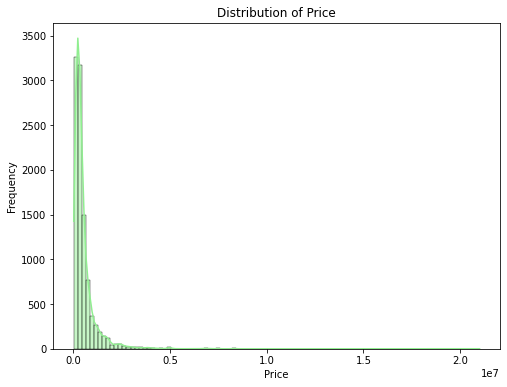

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins = 100, kde = True, color = "lightgreen")
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Price column is highly skewed. I will log-transform this data. A log transformation reduces the impact of extreme values by compressing the range. This is especially useful for right-skewed data like property prices.

<Figure size 576x432 with 0 Axes>

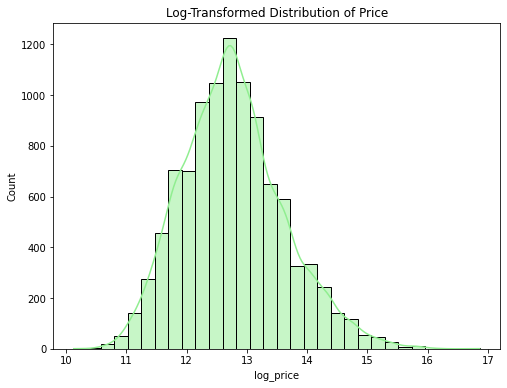

In [31]:
plt.figure(figsize=(8, 6))
df['log_price'] = np.log1p(df['price'])
plt.figure(figsize=(8, 6))
sns.histplot(df['log_price'], bins=30, kde=True, color = "lightgreen")
plt.title('Log-Transformed Distribution of Price')
plt.show()

Now that our prices look like a normal distribution we can use the Empirical Rule to provide quick insights.

In [32]:
mean_log_price = df['log_price'].mean() # mean value
std_log_price = df['log_price'].std() #standard deviation

# Calculate the ranges for 68% and 95%
one_std_range = (mean_log_price - std_log_price, mean_log_price + std_log_price)
two_std_range = (mean_log_price - 2 * std_log_price, mean_log_price + 2 * std_log_price)

#Convert back to original price scale
price_bounds_68 = ((np.expm1(one_std_range[0])),(np.expm1(one_std_range[1])))
price_bounds_95 = ((np.expm1(two_std_range[0])),(np.expm1(two_std_range[1])))

print(price_bounds_68)
print(price_bounds_95)

(np.float64(151114.72804382214), np.float64(821612.2032553002))
(np.float64(64807.32497271883), np.float64(1915781.847845648))


- 68% of the properties have prices between 151114.72 and 821612.20 euros. 
- 95% of the properties have prices between 64807.32 and 1915781.84euros

### Property characteristics

Let's have a better grasp of the characteristics distribution

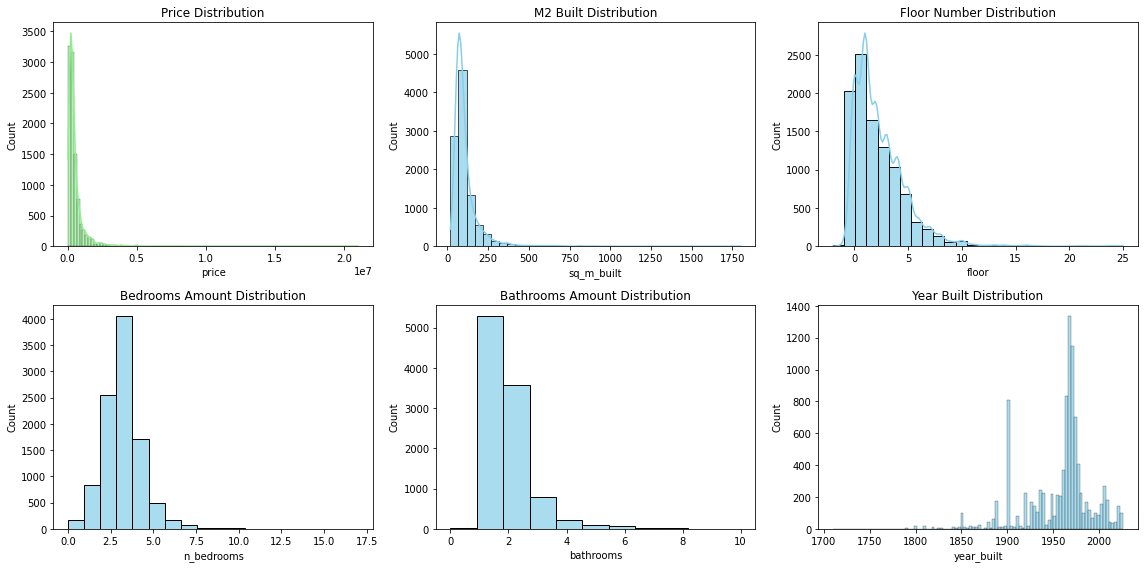

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))  # 2 row, 3 columns

#Price distribution
sns.histplot(data = df, x = 'price', kde= True, bins = 100, color = "lightgreen",
             alpha=0.7,ax = axes[0,0]).set_title("Price Distribution")

    
#Square meter built
sns.histplot(data = df, x = 'sq_m_built', kde= True, bins = 36, color = "skyblue",
             alpha=0.7,ax = axes[0,1]).set_title("M2 Built Distribution")

    
#Floor number distribution
sns.histplot(data = df, x = 'floor', kde= True, bins = 26, color = "skyblue",
             alpha=0.7,ax = axes[0,2]).set_title("Floor Number Distribution")

    
#Bedrooms amount distribution
sns.histplot(data = df, x = 'n_bedrooms', bins = 18, color = "skyblue",
             alpha=0.7,ax = axes[1,0]).set_title("Bedrooms Amount Distribution")

#Bathrooms amount distribution
sns.histplot(data = df, x = 'bathrooms', bins = 11, color = "skyblue",
             alpha=0.7,ax = axes[1,1]).set_title("Bathrooms Amount Distribution")

    
#Year built distribution
sns.histplot(data = df, x = 'year_built', bins = 100, color = "skyblue",
             alpha=0.7,ax = axes[1,2]).set_title("Year Built Distribution")
        
plt.tight_layout()
plt.show()
    

### Property Features 

What is the distribution in our property features?

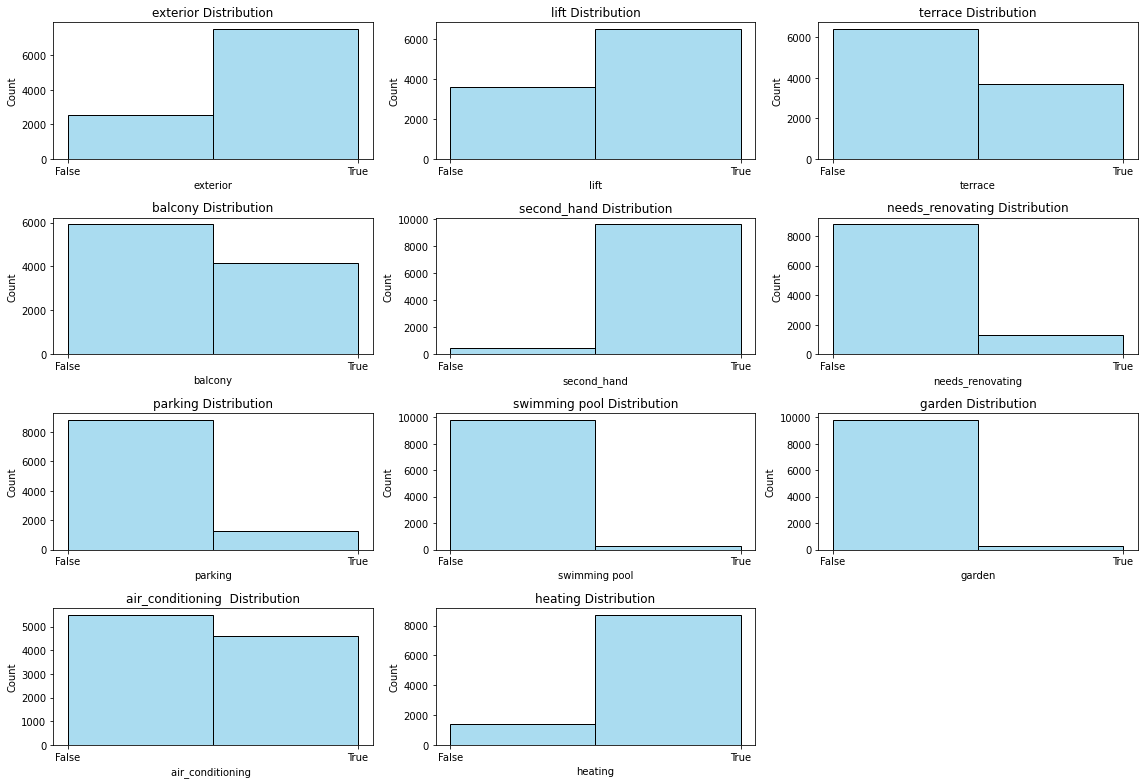

In [34]:
fig, axes = plt.subplots(4, 3, figsize=(16,11)) #4 rows and 3 columns
index_x = 0
index_y = 0
for f in property_features:
    # Create the histplot
    sns.histplot(data = df, x = f, bins = 2, color = "skyblue",
             alpha=0.7,ax = axes[index_y,index_x]).set_title(f+" Distribution")
    
    # Set custom x-axis tick labels to "True" and "False"
    axes[index_y, index_x].set_xticks([0, 1])
    axes[index_y, index_x].set_xticklabels(['False', 'True'])
    
    # Update the subplot indices
    index_x = index_x +1
    if(index_x > 2):
        index_x = 0
        index_y = index_y+1
        
# Remove the extra (empty) plot        
fig.delaxes(axes[3,2]) 

plt.tight_layout()
plt.show()
    
    

## Multivariable analysis

It's time to study the relationship between our data variables.

### Correlation between numeric variables

The first step our multivariable analysis is looking at the correlation between numerical variables. This way we can identify strong relationships.

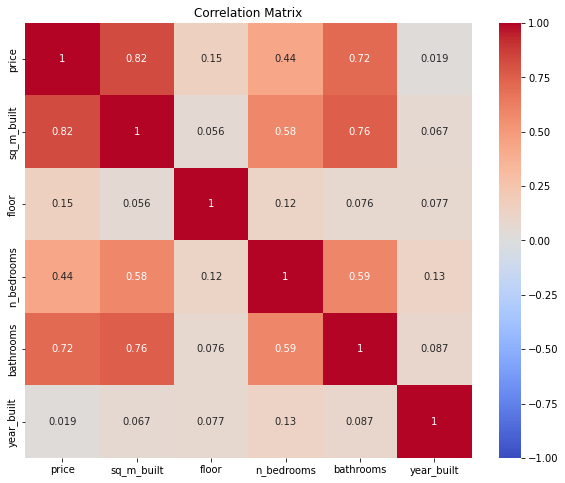

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[property_characteristics].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Now that we can see our correlation we can have a better understanding of our relatinships. Since in this study we are focusing on price, we can say that.

- **Price:**
    - Has a Very Strong positive correlation with Square Meter Built.
    - Has a Strong Positive correlation with Bathroom amount
    - Has a Moderate Positive correlation with Bedroom amount
    - Has a Very Weak Positive correlation with Floor number
    - Has no correlation with Year built

### Price vs Property Features

We can now explore how price behaves in relation to different property features. Since the 'price' variable is heavily skewed, I will use 'log_price' for comparison to provide a clearer visualization.

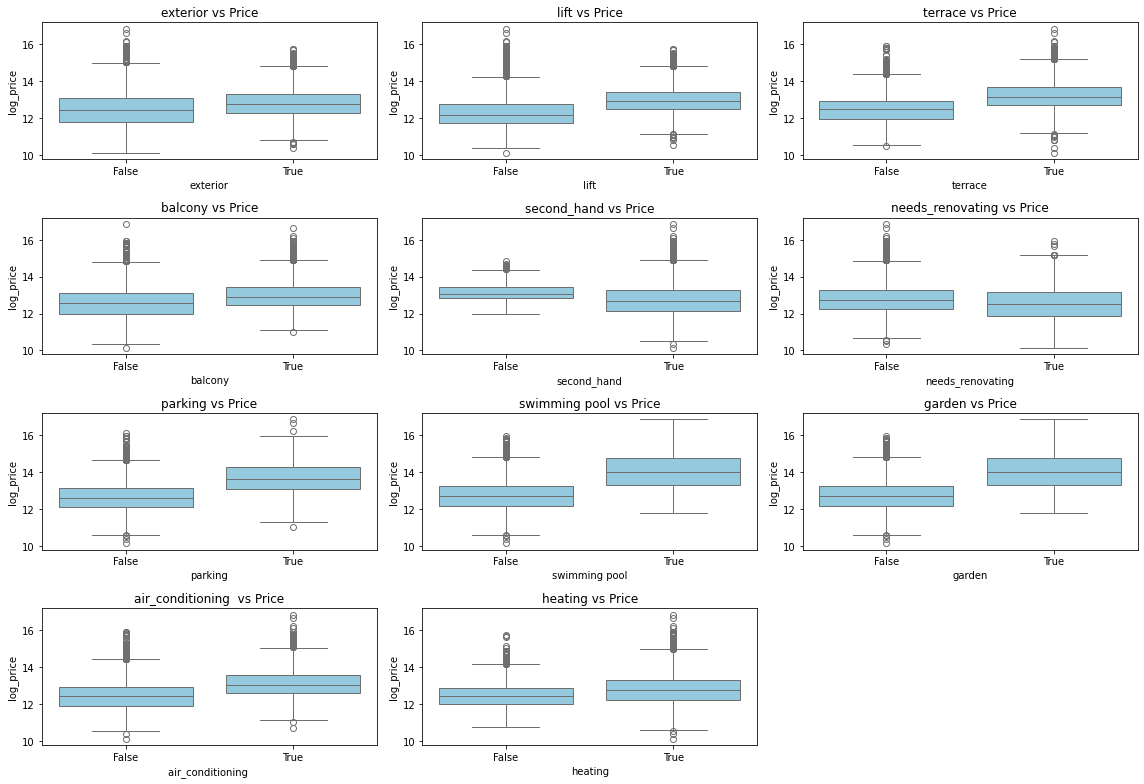

In [36]:
fig, axes = plt.subplots(4, 3, figsize=(16,11)) #4 rows and 3 columns
index_x = 0
index_y = 0
for f in property_features:
    # Create the box plot
    sns.boxplot(x= f, y='log_price', data=df, color = "skyblue",
                ax = axes[index_y,index_x]).set_title(f+" vs Price")
    
    # Set custom x-axis tick labels to "True" and "False"
    axes[index_y, index_x].set_xticks([0, 1])
    axes[index_y, index_x].set_xticklabels(['False', 'True'])
    
    # Update the subplot indices
    index_x = index_x +1
    if(index_x > 2):
        index_x = 0
        index_y = index_y+1
        
# Remove the extra (empty) plot        
fig.delaxes(axes[3,2]) 

plt.tight_layout()
plt.show()
    

We can see that 'luxury' related features like garden, swimming pool or parking has the most impact on price on average. Lift, air conditioning and terrace also has a moderate impact on average in the final price.

### Price vs Property type

How price behave with the different property types?

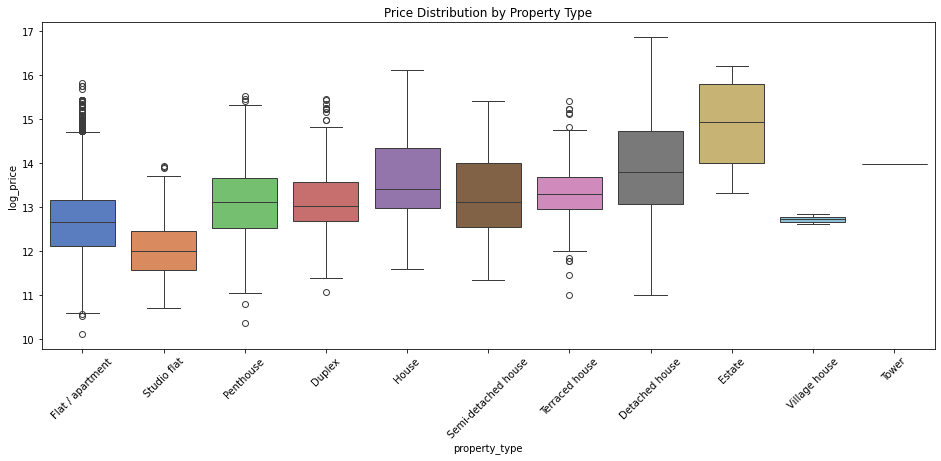

In [37]:
# box plot of 'log_price' by 'property_type'
plt.figure(figsize=(16, 6))
sns.boxplot(x='property_type', y='log_price', data=df, palette="muted")
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)
plt.show()

- Based on the median price 'Studio flats' are the least expensive properties and 'Estate' properties are the most expensive
- 'Detached house' has the most expensive property
- 'Flat / apartment' has the cheapest property
- 'Detached house' has the wider range of prices

## Geospatial analysis

In this section I will explore the geospatial variables that are avalible in the dataset

### City Distribution

Let's see the distribution of the properties per city

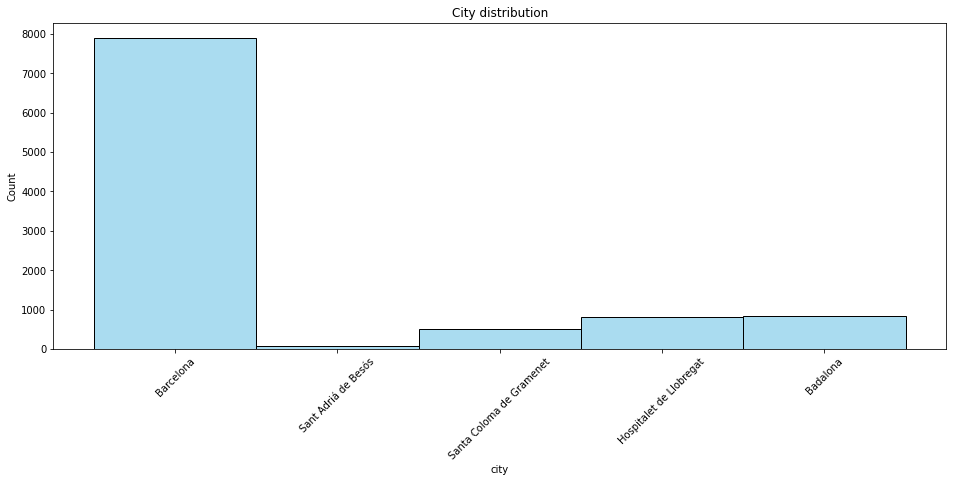

In [38]:
# City distribution
plt.figure(figsize=(16, 6))
sns.histplot(data = df, x = 'city', color = "skyblue",
             alpha=0.7)
plt.title('City distribution')
plt.xticks(rotation=45)
plt.show()


- Barcelona has the most properties with around 800 properties
- Sant Adriá de Besós has the least properties 
- Santa Coloma de Gramenet, Hospitalet de Llobregat and Badalona have a similar number of properties(around 500-900)

### Neighborhood distribution per city

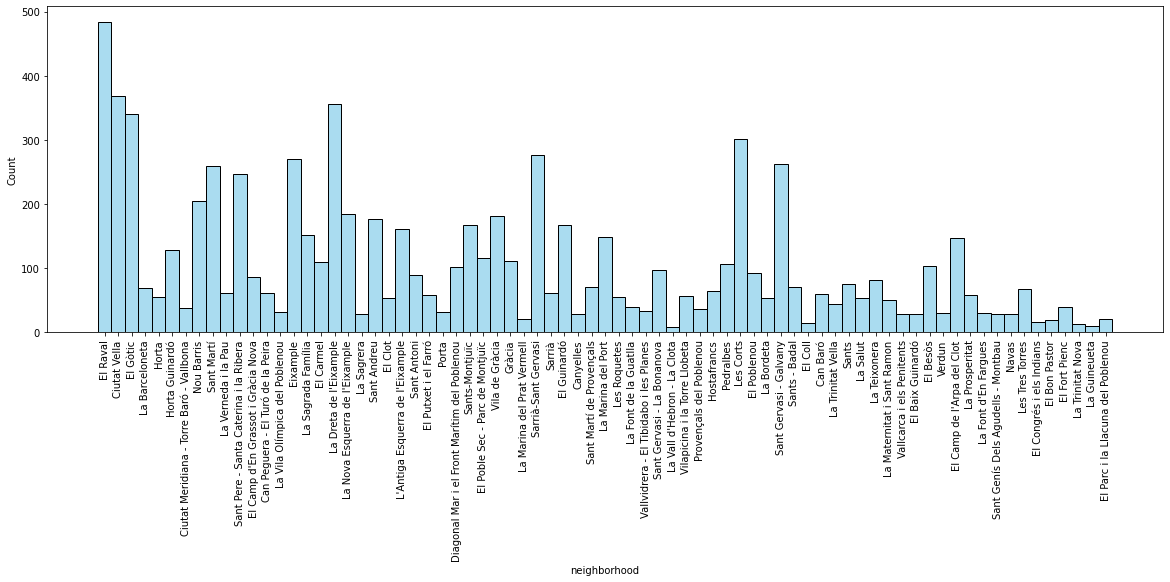

In [39]:
#Barcelona
plt.figure(figsize=(20, 6))
sns.histplot(data = (df.loc[df['city'] == 'Barcelona']), x = 'neighborhood',color = "skyblue",
             alpha=0.7)
plt.xticks(rotation=90)
plt.show()


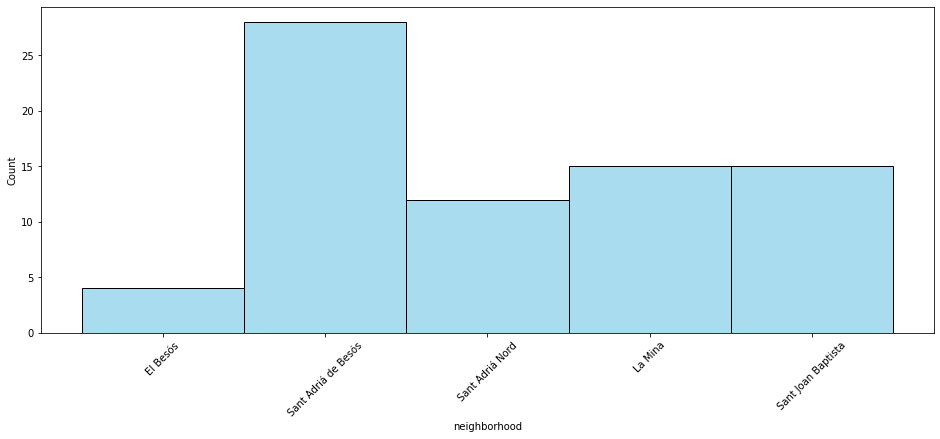

In [40]:
#Sant Adriá de Besòs
plt.figure(figsize=(16, 6))
sns.histplot(data = (df.loc[df['city'] == 'Sant Adriá de Besós']), x = 'neighborhood',color = "skyblue",
             alpha=0.7)
plt.xticks(rotation=45)
plt.show()


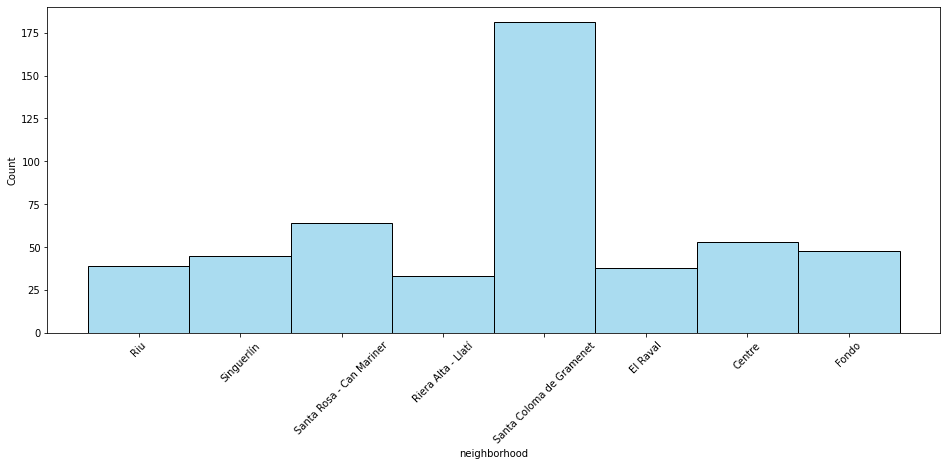

In [41]:
#Santa Coloma de Gramenet
plt.figure(figsize=(16, 6))
sns.histplot(data = (df.loc[df['city'] == 'Santa Coloma de Gramenet']), x = 'neighborhood',color = "skyblue",
             alpha=0.7)
plt.xticks(rotation=45)
plt.show()


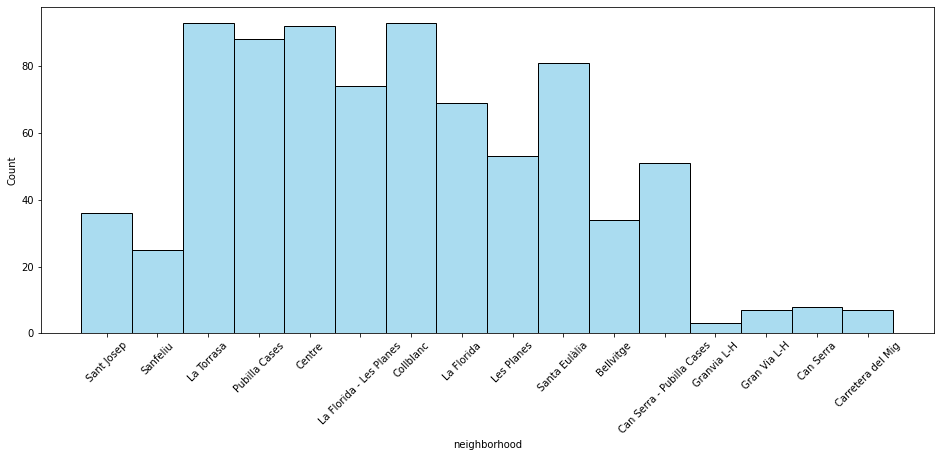

In [42]:
#Hospitalet de Llobregat
plt.figure(figsize=(16, 6))
sns.histplot(data = (df.loc[df['city'] == 'Hospitalet de Llobregat']), x = 'neighborhood',color = "skyblue",
             alpha=0.7)
plt.xticks(rotation=45)
plt.show()

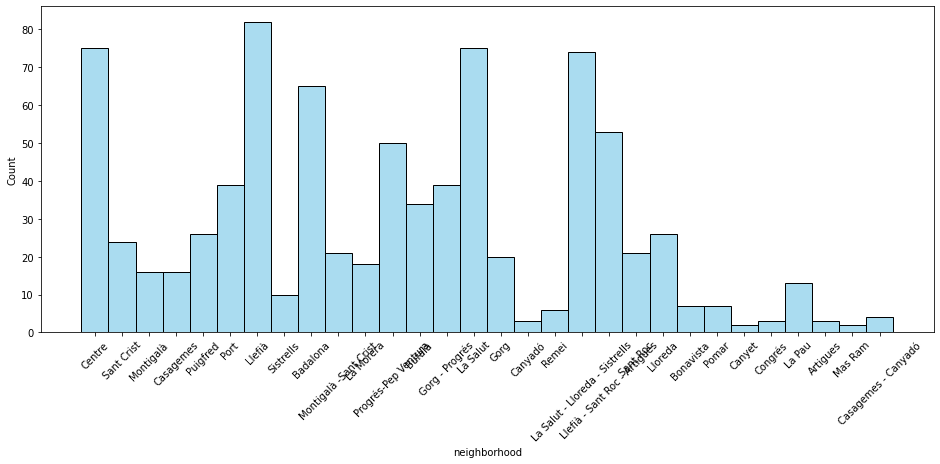

In [43]:
#Badalona
plt.figure(figsize=(16, 6))
sns.histplot(data = (df.loc[df['city'] == 'Badalona']), x = 'neighborhood',color = "skyblue",
             alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## Price vs Location

#### Price Distribution by city

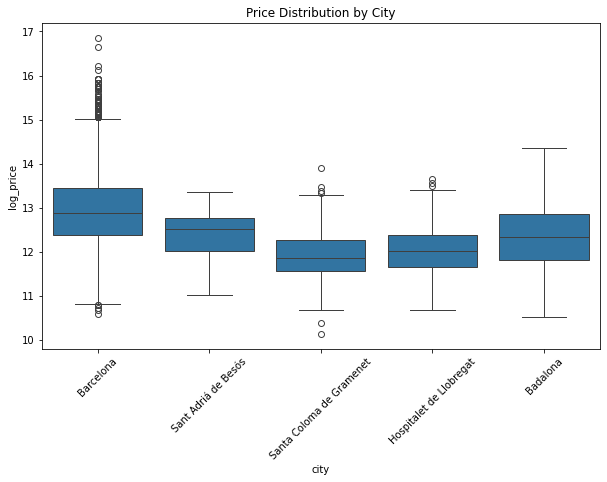

In [44]:
# Boxplot of 'log_price' by 'city'
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='log_price', data=df)
plt.title('Price Distribution by City')
plt.xticks(rotation=45)
plt.show()

There are some neighborhoods in different cities that share names. To be able to visualize all the neighborhoods without issues I will create a new column joining 'city' and 'neighborhood'. Then I create a create a new dataframe to sort the values by the median price

In [45]:
#Concate columns
df['city-neighborhood']=df['city']+' - '+df['neighborhood']

#Calculate the mean price for each city-neighborhood
median_prices = df.groupby('city-neighborhood')['price'].median().sort_values(ascending = True)

#Sort the Dataframe
sorted_df = df.set_index('city-neighborhood').loc[median_prices.index].reset_index()

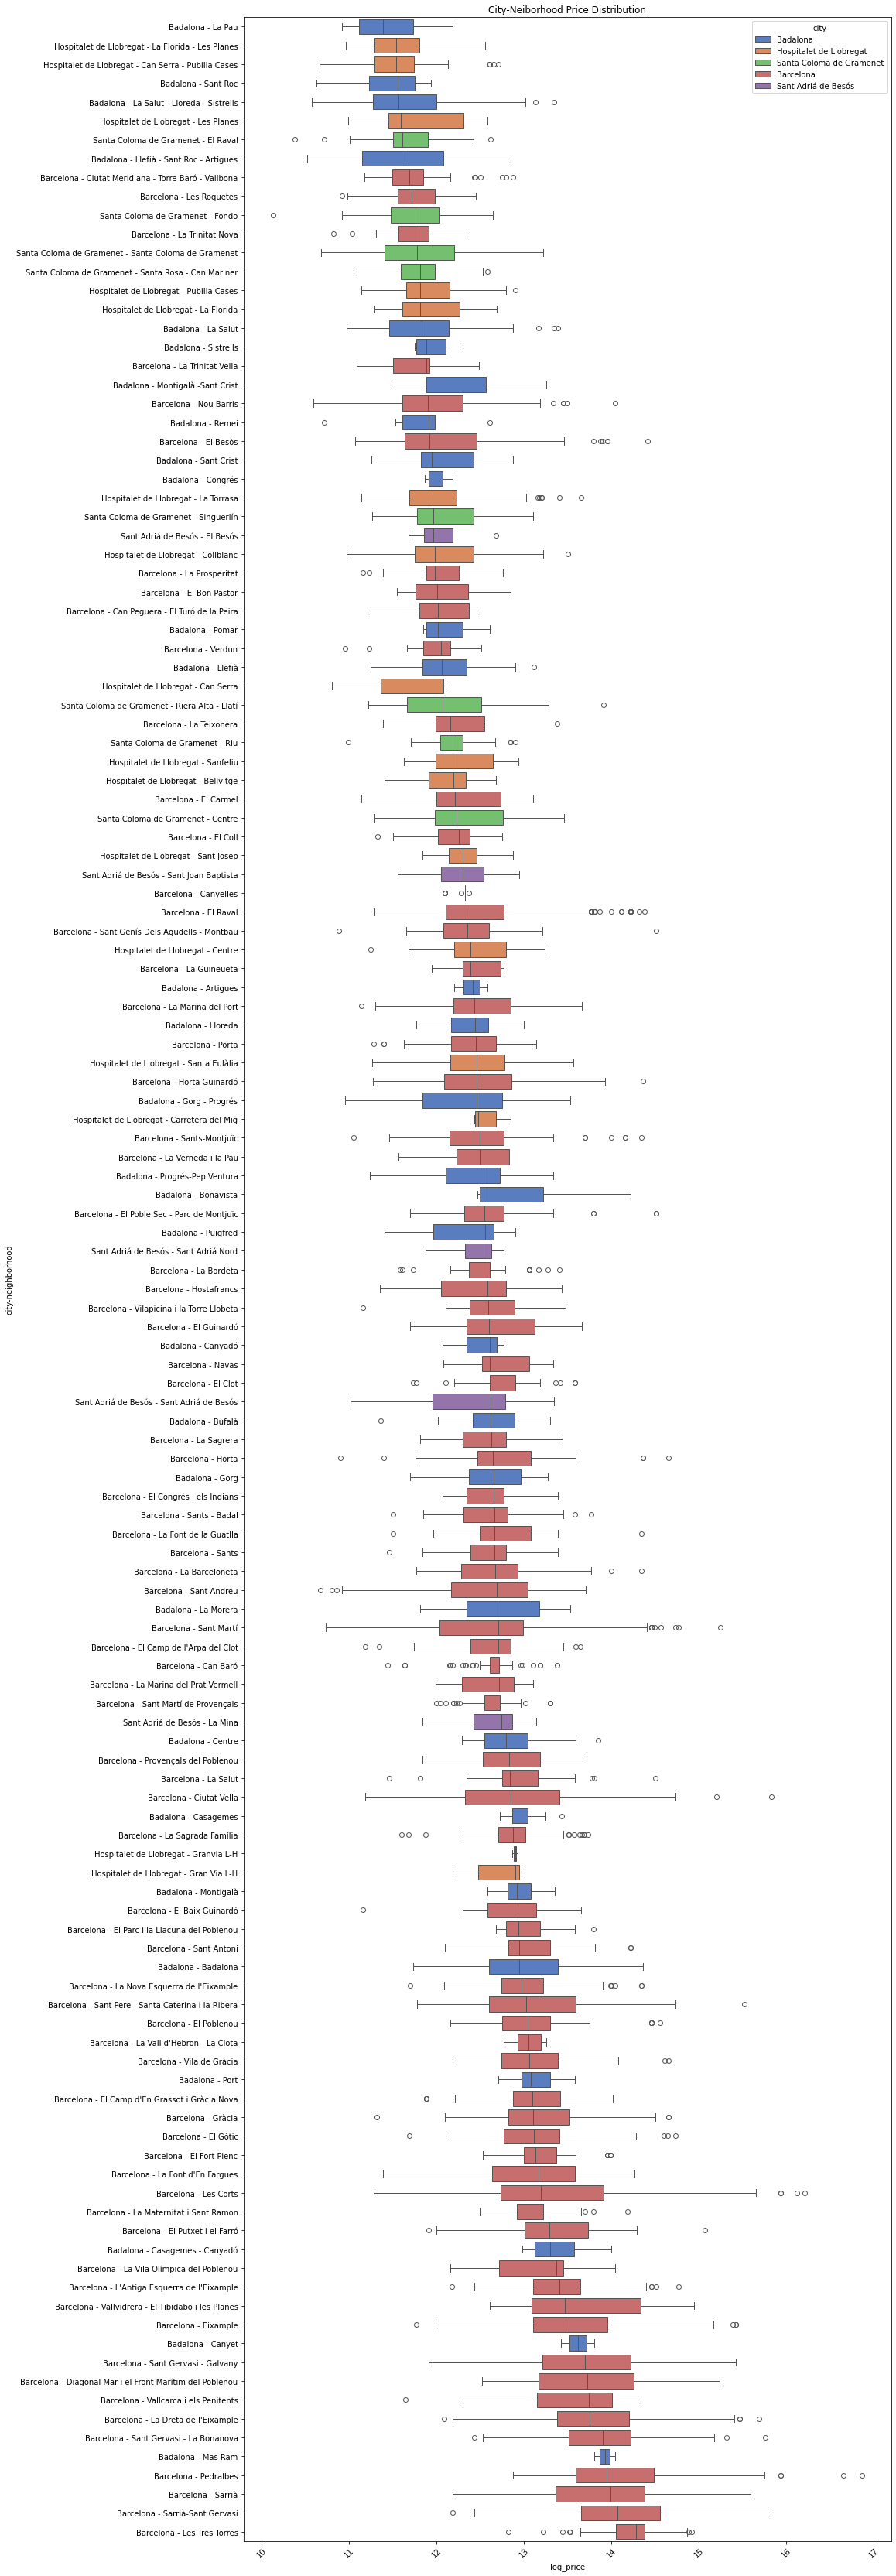

In [46]:
# City distribution box plot
plt.figure(figsize=(15, 60))
sns.boxplot(data = sorted_df, x = 'log_price', y='city-neighborhood', hue='city' , color = "skyblue", palette="muted")
plt.title('City-Neiborhood Price Distribution')
plt.xticks(rotation=45)
plt.show()

And finally I will upload the final dataset in case anyone want to play with it

In [47]:
df.to_csv("clean_data.csv",index = False)

Thank you for taking your time reading my analysis. Reviews are more than welcome.